In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
url = 'https://raw.githubusercontent.com/shecho30/IA/main/Aprendizaje%20No%20Supervisado/data.csv'

In [ ]:
df = pd.read_csv(url, sep=';')

In [ ]:
df.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360000000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,670000000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1120000000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,890000000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,970000000


In [ ]:
df.describe()

,Habitaciones,Baños,Área,Valor
count,9520.000000,9520.000000,9520.000000,9.520000e+03
mean,3.072479,2.447899,146.664706,6.020624e+08
std,2.049856,1.255314,1731.379622,7.046021e+08
min,1.000000,0.000000,2.000000,6.000000e+07
25%,2.000000,2.000000,57.000000,2.500000e+08
50%,3.000000,2.000000,80.000000,4.091825e+08
75%,3.000000,3.000000,135.000000,6.800000e+08
max,110.000000,9.000000,166243.000000,1.600000e+10


In [ ]:
# Eliminar cualquier fila que contenga valores nulos o faltantes
df = df.dropna()

In [ ]:
tipo = df.groupby('Tipo')['Tipo'].count()
tipo

Tipo
Apartamento            7294
Bodega                   13
Casa                   2034
Edificio                 22
Finca                    11
Local                    38
Lote                      6
Oficina/Consultorio      60
Name: Tipo, dtype: int64

Text(0.5, 1.0, 'Vivienda Bogota')

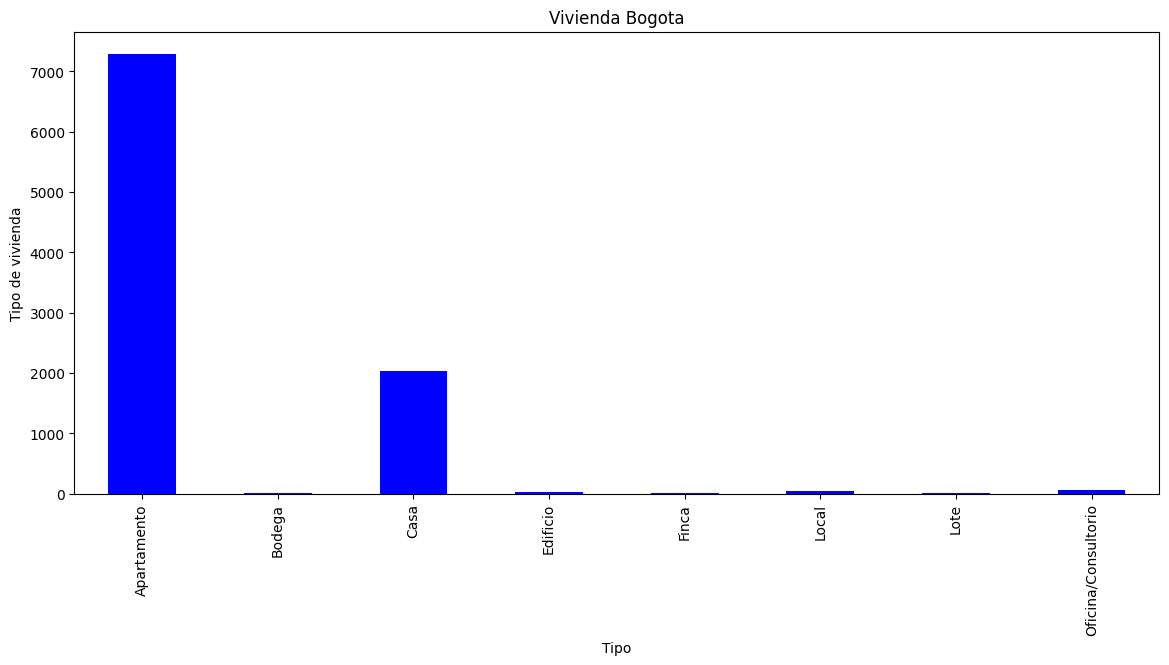

In [ ]:
plt.figure(figsize=(14,6))
tipo.plot(kind='bar', color='Blue')
plt.xlabel('Tipo')
plt.ylabel('Tipo de vivienda')
plt.title('Vivienda Bogota')

In [ ]:
barrio = df.groupby('Barrio').agg({'Barrio': 'count', 'Valor': 'sum'}).sort_values(by='Valor', ascending=False).head(20)
barrio

,Barrio,Valor
Barrio,,
Usaquén,1105,837710365000
Zona Noroccidental,877,544453061408
Chapinero,332,372130933118
Santa Barbara,438,320097803000
Cedritos,554,270027733421
Suba,443,266406040022
Chico Reservado,225,260372839071
Barrios Unidos,473,259877762703
Kennedy,589,207963648911


<Axes: xlabel='Barrio'>

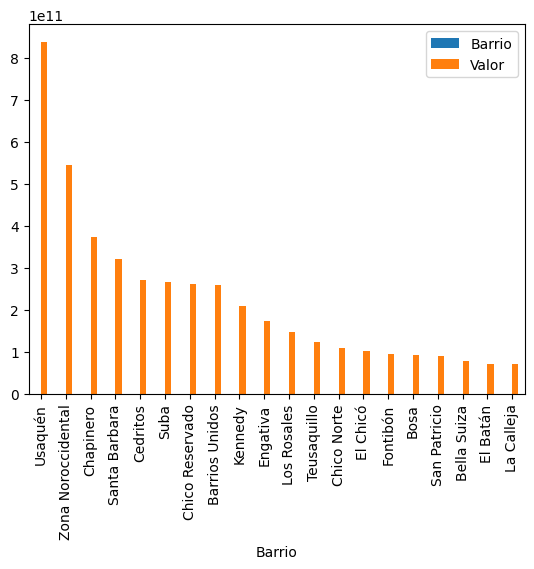

In [ ]:
barrio.plot(kind='bar')


In [ ]:
df['Área'].head()

0     70
1    170
2    144
3    154
4    128
Name: Área, dtype: int64

<ipython-input-48-413408057f7d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


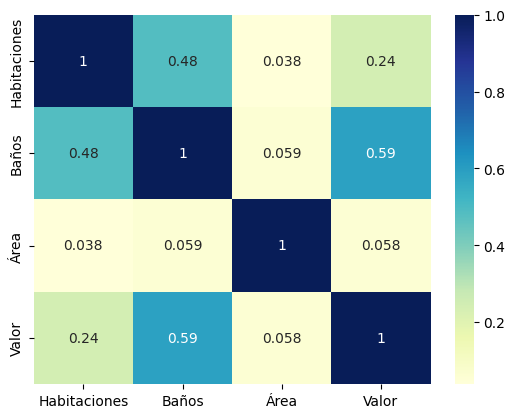

In [ ]:
correlation_matrix = df.corr()

# Crear un mapa de calor para la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

# Mostrar el mapa de calor
plt.show()

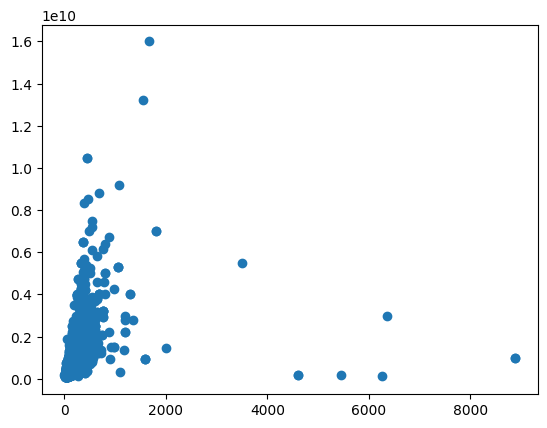

In [ ]:
plt.scatter(df['Área'], df['Valor'])
plt.show();

In [ ]:
filtro = df['Área'] <= 500
df_filtrado = df.loc[filtro]

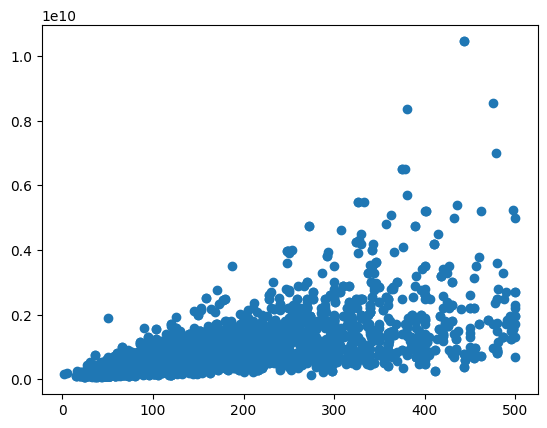

In [ ]:
plt.scatter(df_filtrado['Área'], df_filtrado['Valor'])
plt.show();

In [ ]:
Data = list(zip(df_filtrado['Área'], df_filtrado['Valor']))


In [ ]:
kmeans = KMeans(n_clusters = 3).fit(Data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
print(centroids)

[[8.42643455e+01 3.65197338e+08]
 [3.35238889e+02 3.42058098e+09]
 [2.11322473e+02 1.16739375e+09]]


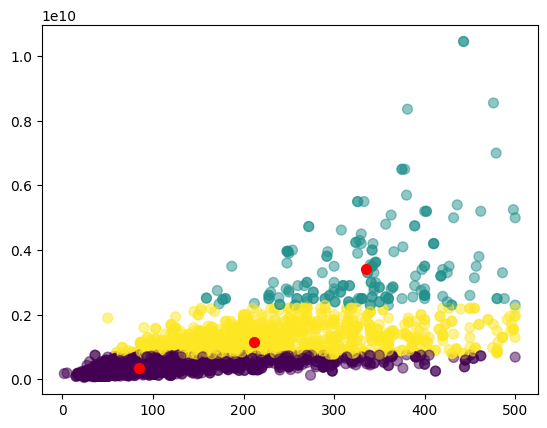

In [ ]:
plt.scatter(df_filtrado['Área'],df_filtrado['Valor'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],c='red',s=50)
plt.show()